#### Задание 1.
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
              800, 1500, 2000, 450, 1000], 
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X_st[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

*Ограничим y_pred сверху и снизу малым константным значением:*

In [5]:
def calc_logloss(y, y_pred):
    constrain = 1e-15
    y_pred = pd.Series(y_pred)
    y_pred[y_pred < constrain] = constrain
    y_pred[y_pred > 1 - constrain] = 1 - constrain
    y_pred = np.array(y_pred)

    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [6]:
def sigmoid(x):
    return  1/(1+np.exp(-x))

#### Задание 2.

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [7]:
def eval_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    w_list = [W.copy()]
    errors = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        old_W = W.copy()
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
        w_list.append(W.copy())
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
        if np.linalg.norm(W - old_W, ord=2) < 1e-3:
            z = np.dot(W, X)
            y_pred = sigmoid(z)
            err = calc_logloss(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
            
    w_list = np.array(w_list)
    
    return W, w_list, errors

*Подобрать оптимальные параметры для логистической регрессии, чтобы получить минимальный logloss невозможно, так как логарифм не имеет минимума. Соответственно градиентный спуск может очень долго идти в сторону уменьшения ошибки, но не достигать минимума. Ниже приведена реализация двух алгоритмов - один с плавным спуском, а второй очень агрессивный. Также далее идут графики, иллюстрирующие работу этих алгоритмов.*

In [8]:
alpha = .5
W1, w_list1, errors1 = eval_model(X_st, y, 30000, alpha)

3000 [-13.9452139   -1.673896    -3.20793787  11.64783166] 0.22733574187276787
6000 [-20.12251585  -2.20572082  -5.06399074  16.65680198] 0.18224925407755682
9000 [-24.75120926  -2.61226846  -6.42565532  20.41022448] 0.1570960825181317
12000 [-28.46628442  -2.94037977  -7.50619849  23.41754634] 0.14096233908336175
15000 [-31.58124983  -3.21545009  -8.40617794  25.93371632] 0.12965759007092098
18000 [-34.27538573  -3.45253656  -9.18157943  28.10488195] 0.12122467740643465
20730 [-36.45578216  -3.6433829   -9.80789023  29.85789089] 0.1151686377027038


In [9]:
alpha = 47
W2, w_list2, errors2 = eval_model(X_st, y, 500, alpha)

50 [-81.24851397 -54.10055184  41.12320825 159.50458585] 6.32301891782077
100 [-157.60647371  -45.62551915    5.69072633  209.12580964] 4.168217066043637
150 [-235.8644561   -86.78982675  -39.24938462  220.5280049 ] 3.197750894181657
200 [-280.0620602   -41.6103155   -52.89174971  252.81777471] 0.33513016556552105
250 [-286.20914901  -38.01412053  -65.36344941  256.81002046] 0.007072277241269095
300 [-286.62665127  -37.90426359  -66.07786137  256.3925182 ] 0.006696284324973337
350 [-286.95322702  -37.90969721  -66.72153394  256.06594244] 0.006427684758475924
400 [-287.23216264  -37.96902894  -67.3228836   255.78700683] 0.006205393035488819
450 [-287.48115125  -38.05793982  -67.89381012  255.53801821] 0.0060101493916959
500 [-287.7092081   -38.16444417  -68.44064007  255.30996137] 0.005833529535126196


In [10]:
def plot_model(errors, w_list, xlim=None):
    plt.figure(figsize=(13, 6))

    plt.subplot(121)
    plt.plot(range(len(errors)), errors)
    plt.title('Logloss')
    plt.xlabel('Iteration number')
    plt.ylabel('Logloss')
    if xlim:
        plt.xlim(0, xlim)

    plt.subplot(122)
    for itm in range(w_list.shape[1]):
        label = 'w' + str(itm)
        plt.plot(range(w_list.shape[0]), w_list[:, itm], label=label)

    plt.title('Weights')
    plt.legend()
    plt.xlabel('Iteration number')
    plt.ylabel('W')
    if xlim:
        plt.xlim(0, xlim)
    
    plt.show()

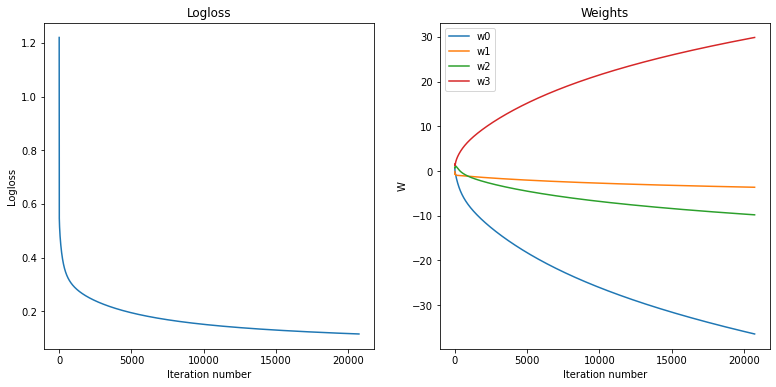

In [11]:
plot_model(errors1, w_list1)

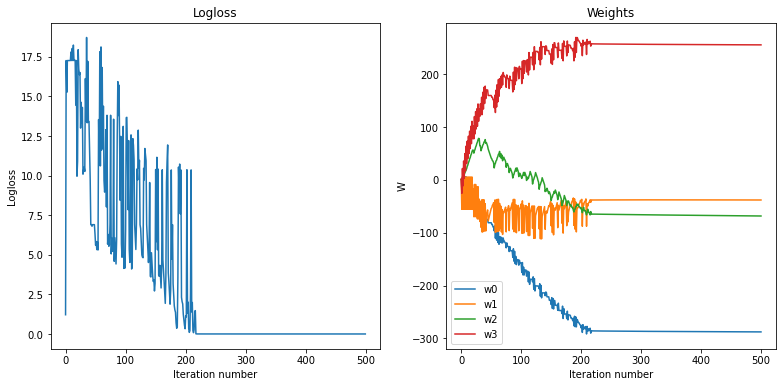

In [12]:
plot_model(errors2, w_list2)

*Как видим на графике весов первого алгоритма, модель может практически бесконечно увеличивать веса, двигаясь в сторону уменьшения ошибки. Но минимум так и не будет достигнут, потому что его нет. На агрессивном алгоритме я решил посмотреть, до каких значений будут увеличиваться веса. Модель остановилась на некоторых весах, но это произошло из за того, что мы в функцию вычисления ошибки внесли ограничения на значения y_pred*

*Итак, модель логистической регрессии склонна к переобучению. Соответственно, чтобы ограничить значения весов, модель следует использовать с регуляризацией.*

#### Задание 3.

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [13]:
def calc_pred_proba(W, X):
    return sigmoid(np.dot(W, X))

In [14]:
y_pred_proba1 = calc_pred_proba(W1, X_st)
y_pred_proba1

array([0.34670239, 0.00920358, 1.        , 0.06560536, 0.93832066,
       0.04486437, 1.        , 0.01715164, 0.59333555, 0.99999981])

In [15]:
y_pred_proba2 = calc_pred_proba(W2, X_st)
y_pred_proba2

array([2.87500164e-02, 1.62791547e-14, 1.00000000e+00, 2.19517653e-08,
       1.00000000e+00, 4.53111324e-04, 1.00000000e+00, 1.29327281e-21,
       9.71730384e-01, 1.00000000e+00])

*Как видно, оба алгоритма при отсечке в 0.5 идеально справляются с задачей классификации. У второго алгоритма более уверенные прогнозы верояности, но при этом значительно выше веса. Что еще раз говорит о необходимости регуляризации.*

#### Задание 4.

Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [17]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.array(list(map(int, y_pred_proba >= .5)))
    return y_pred

In [18]:
y_pred1 = calc_pred(W1, X_st)
y_pred1

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [19]:
y_pred2 = calc_pred(W2, X_st)
y_pred2

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

#### Задание 5.

Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [20]:
def accuracy(y, y_pred):
    res = np.array(list(map(int, y_pred == y)))
    return res.mean()

In [21]:
accuracy(y, y_pred1)

1.0

In [22]:
def confusion_matrix(y, y_pred):
    tp = np.array(list(map(int, (y_pred == 1) * (y == 1)))).sum()
    tn = np.array(list(map(int, (y_pred == 0) * (y == 0)))).sum()
    fp = np.array(list(map(int, (y_pred == 1) * (y == 0)))).sum()
    fn = np.array(list(map(int, (y_pred == 0) * (y == 1)))).sum()
    matrix = pd.DataFrame({'y=1': [tp, fn],
                          'y=0': [fp, tn]}, 
                          index=['y_pred=1', 'y_pred=0'])
    return matrix

In [23]:
confusion_matrix(y, y_pred1)

,y=1,y=0
y_pred=1,5,0
y_pred=0,0,5


In [25]:
def precision(y, y_pred):
    m = confusion_matrix(y, y_pred1)
    return m.loc['y_pred=1', 'y=1'] / m.loc['y_pred=1'].sum()

In [26]:
precision(y, y_pred1)

1.0

In [27]:
def recall(y, y_pred):
    m = confusion_matrix(y, y_pred1)
    return m.loc['y_pred=1', 'y=1'] / m['y=1'].sum()

In [28]:
recall(y, y_pred1)

1.0

In [29]:
def f1_score(y, y_pred):
    res = 2 * precision(y, y_pred) * recall(y, y_pred) / (precision(y, y_pred) + recall(y, y_pred))
    return res

In [30]:
f1_score(y, y_pred1)

1.0

#### Задание 7.

Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [31]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=.5):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    w_list = [W.copy()]
    errors = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        old_W = W.copy()
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + 2 * lambda_ * W)
        
        w_list.append(W.copy())
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
        if np.linalg.norm(W - old_W, ord=2) < 1e-3:
            z = np.dot(W, X)
            y_pred = sigmoid(z)
            err = calc_logloss(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
            
    w_list = np.array(w_list)
    
    return W, w_list, errors

In [32]:
alpha = .1
W3, w_list3, errors3 = eval_model_l2(X_st, y, 30000, alpha, lambda_=.5)
W4, w_list4, errors4 = eval_model_l2(X_st, y, 30000, alpha, lambda_=.1)

46 [-0.01603144 -0.04705457  0.05646432  0.12079678] 0.6729036029020361
126 [-0.12340527 -0.21079131  0.26123357  0.45998787] 0.6195630287770578


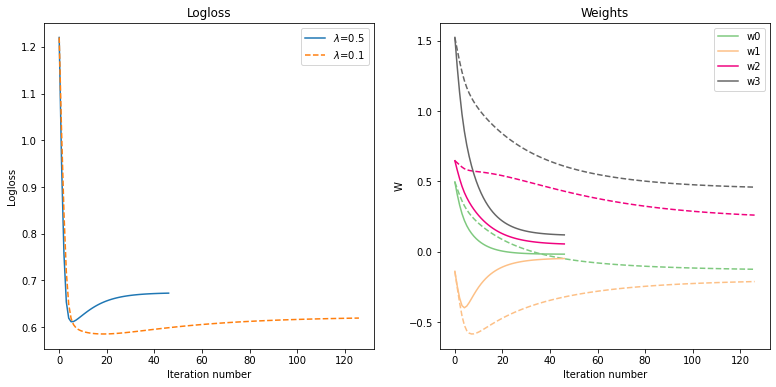

In [33]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.plot(range(len(errors3)), errors3, label='$\lambda$=0.5')
plt.plot(range(len(errors4)), errors4, label='$\lambda$=0.1', linestyle='--')
plt.title('Logloss')
plt.xlabel('Iteration number')
plt.ylabel('Logloss')
plt.legend()

plt.subplot(122)
colors = [plt.cm.Accent(i/float(w_list3.shape[1]-1)) for i in range(w_list3.shape[1])]
for itm in range(w_list3.shape[1]):
    label = 'w' + str(itm)
    plt.plot(range(w_list3.shape[0]), w_list3[:, itm], label=label, c=colors[itm])
    plt.plot(range(w_list4.shape[0]), w_list4[:, itm], c=colors[itm], linestyle='--')

plt.title('Weights')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('W')

plt.show()

*На графиках приведены зависимости ошибок и весов от итераций при L2-регуляризации. Видно, что при большем коэффициенте регуляризации значения весов по модулю падают быстрее и сильнее. Также важно, что при L2-регуляризации сумма функций logloss и регуляризатора имеет истинный минимум. Сама logloss при большем коэффициенте будет выше, но, как это было показано выше, это не играет особой роли при предсказании метки класса.*

In [34]:
def plot_weights(model, X, y, step, max_step):
    plt.figure(figsize=(13, 6))
    weights = []
    for i in np.arange(0, max_step, step):
        W3, _, _ = model(X, y, 30000, alpha=.1, lambda_=i)
        weights.append(W3)
    weights = np.array(weights)
    for i in range(weights.shape[1]):
        plt.plot(np.arange(0, weights.shape[0]*step, step), weights[:, i], label=f'W{i}')

    plt.title('Weights for ridge gradient descent')
    plt.legend()
    plt.xlabel('lambda')
    plt.ylabel('weight')
    # plt.xlim([10, 82])
    # plt.ylim([0, 500])
    plt.show()

3000 [-5.91004767 -1.08773886 -0.62127728  5.36155604] 0.32501347614925347
5853 [-8.53579974 -1.24563049 -1.51151549  7.33020294] 0.28383397444444625
965 [-1.75813317 -0.79442381  0.626653    2.34052111] 0.45010736062514206
575 [-1.03741193 -0.67298388  0.70330757  1.72530344] 0.4911786905233614
411 [-0.73151279 -0.58949937  0.67742847  1.41515725] 0.5152237212212734
320 [-0.5612583  -0.52826996  0.63663786  1.21953345] 0.5321246967005583
264 [-0.45427606 -0.4812885   0.5961193   1.08320804] 0.5449196424423498


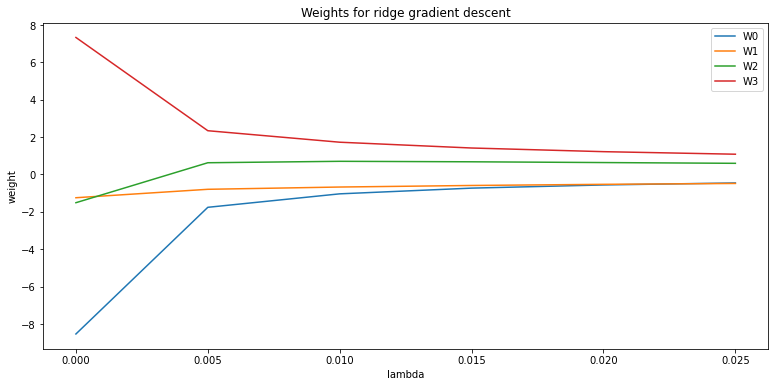

In [35]:
plot_weights(eval_model_l2, X_st, y, 0.005, 0.03)

*На этом графике приведена зависимость конечных весов алгоритма от коэффициента регуляризации для L2-регуляризации.*

In [36]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=.5):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    w_list = [W.copy()]
    errors = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        old_W = W.copy()
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        
        w_list.append(W.copy())
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
        if np.linalg.norm(W - old_W, ord=2) < 1e-3:
            z = np.dot(W, X)
            y_pred = sigmoid(z)
            err = calc_logloss(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
            
    w_list = np.array(w_list)
    
    return W, w_list, errors

In [37]:
alpha = .01
W5, w_list5, errors5 = eval_model_l1(X_st, y, 30000, alpha, lambda_=.1)
W6, w_list6, errors6 = eval_model_l1(X_st, y, 30000, alpha, lambda_=.05)

525 [-1.93297017e-04 -3.78695739e-01  4.41778472e-01  7.42307330e-01] 0.5918419278644739
244 [-0.00148887 -0.59191665  0.6817705   1.10126378] 0.563132088879213


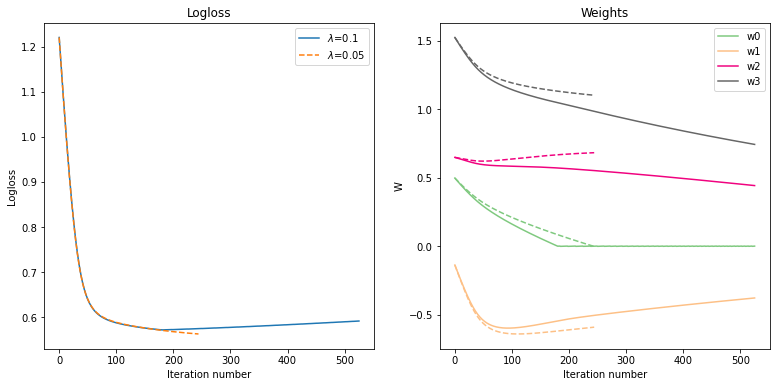

In [38]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.plot(range(len(errors5)), errors5, label='$\lambda$=0.1')
plt.plot(range(len(errors6)), errors6, label='$\lambda$=0.05', linestyle='--')
plt.title('Logloss')
plt.xlabel('Iteration number')
plt.ylabel('Logloss')
plt.legend()

plt.subplot(122)
colors = [plt.cm.Accent(i/float(w_list5.shape[1]-1)) for i in range(w_list5.shape[1])]
for itm in range(w_list5.shape[1]):
    label = 'w' + str(itm)
    plt.plot(range(w_list5.shape[0]), w_list5[:, itm], label=label, c=colors[itm])
    plt.plot(range(w_list6.shape[0]), w_list6[:, itm], c=colors[itm], linestyle='--')

plt.title('Weights')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('W')

plt.show()

*На этих графиках также приведены зависимости ошибок и весов от итераций, но при L1-регуляризации. На графиках видно, что веса при L1-регуляризации могут изменяться менее плавно.*

#### Задание 6.

Могла ли модель переобучиться? Почему?

*Для ответа на вопрос, почему переобучается модель логистической регрессии, создадим простую задачу классификации с одним признаком. Далее обучим ridge-модель с двумя разными коэффициентами регуляризации и проиллюстрируем работу модели:*

In [39]:
X1 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [-1, -2, 6, -3, 7, -4, 8, -5, 9, 10]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [40]:
alpha = .1
W7, w_list7, errors7 = eval_model_l2(X1, y, 30000, alpha, lambda_=1)
W8, w_list8, errors8 = eval_model_l2(X1, y, 30000, alpha, lambda_=.05)

21 [-0.04513498  0.32277475] 0.20661763179803389
179 [-0.32255723  0.86464497] 0.04850598764587109


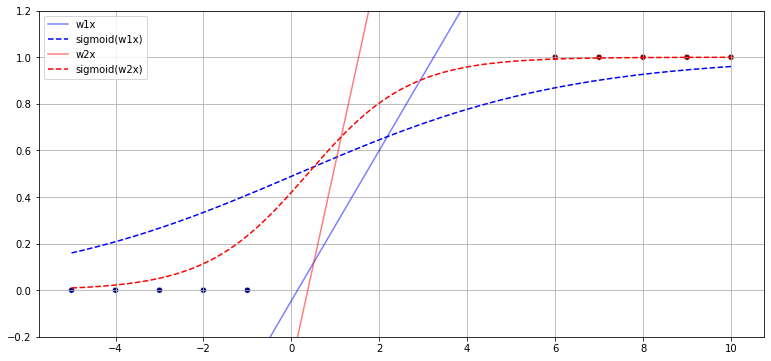

In [44]:
plt.figure(figsize=(13, 6))
x = np.linspace(-5, 10, 160)
sns.scatterplot(X1[1], y, c=y, cmap=plt.get_cmap('jet'))
plt.plot(x, W7[0] + W7[1] * x, c='blue', alpha=.5, label='w1x')
plt.plot(x, sigmoid(W7[0] + W7[1] * x), c='blue',linestyle='--', label='sigmoid(w1x)')
plt.plot(x, W8[0] + W8[1] * x, c='red', alpha=.5, label='w2x')
plt.plot(x, sigmoid(W8[0] + W8[1] * x), c='red',linestyle='--', label='sigmoid(w2x)')
# plt.xlim(0, 11)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid()
plt.show()

*На графике представлены 2 прямые w1x и w2x, ||w1|| < ||w2||. Эти прямые являются аргументом сигмоиды, а она, в свою очередь, показывает вероятность принадлежности к классу 1. Обе сигмоиды отлично решают задачу классификации объектов. Но у красной сигмоиды logloss будет меньше, так как меньше зазор между ней и таргетом. Из-за того, что у логарифма нет минимума, градиентный спуск будет бесконечно двигаться в сторону увеличения весов. В пределе мы получим бесконечные веса, вертикальную прямую линию вместо wx, а сигмоида обратится в ступенчатую функцию.*

*Таким образом, основные причины переобучения модели логистической регрессии состоят в следующем:*
- функция logloss не имеет минимума;
- при увеличении весов сигмоида насыщается все быстрее, уменьшая ошибку.